In [2]:
%load_ext autoreload
%autoreload 2 

from utils.data_download import download_data_with_animation, unzip_data
from utils.read_tensorflow_data import read_tf_data, data_type, create_tf_dataset
from utils.plotting import plot_histories 
import os
from typing import List, Tuple, TypedDict, Dict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from keras.models import Sequential
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    concatenate,
    Dropout,
    Dense,
    Flatten,
    BatchNormalization,
    Activation,
    AveragePooling2D,
    Add,
    Dropout,
    MaxPool2D,
    GlobalAveragePooling2D,
)
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.metrics import Recall
from keras.metrics import Precision

2024-05-15 07:13:45.489628: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 07:13:45.804804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Download data


In [2]:
# data will only be downloaded when the output file does not exist. In this case the file is ./data/data.zip
# if there is any issues remove everything under ./data and run the code again
url = "https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F27069%2F46974%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240422%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240422T195446Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D27f3460b8b1512fc77d5fa919e5f7471c55fe552037869b78d43ddb33f80831a03ed39077650fd90b858ed2f101d2f468053a7199462f3513d0b8dcc100674f5469a5c0a008151acc0041a3bc7074be4d33b2d65462aa5f4e6988f27c8e89737c60fe8dfc0a245cd3915303c5e4488db745aafae9a1a4e6caf34a0000fed7eec3d0a6723983064916e2e2993cc94612de815d32cc9d345622158e7569c4cc0d541cb2b5d0d705461e3821e7c881248dc22390f1a2fed45f2794a442fd3bbb4d727151d4eb5390f37b3a1d167facb8ea5c5b8b79a054e93e90371a96b2c1e3be8549bd09c9a37278fcfeb38aba093157906271145184ddc0f32799f1013733631"
download_data_with_animation(url, "./data/data.zip")
unzip_data("./data/data.zip", "./data/unzipped_data/")

./data/data.zip already exists, skipping download.
./data/unzipped_data/ already exists, skipping unzip.


In [3]:
data_files = [] 
for root, dirs, files in os.walk("./data/unzipped_data/") :
	for file in files:
		data_files.append( os.path.join(root, file).replace('\\', '/') )
  
data_files


['./data/unzipped_data/cv10_labels.npy',
 './data/unzipped_data/test10_labels.npy',
 './data/unzipped_data/cv10_data/cv10_data.npy',
 './data/unzipped_data/test10_data/test10_data.npy',
 './data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

In [4]:
training_files = [file for file in data_files if "training" in file]
training_files

['./data/unzipped_data/training10_0/training10_0.tfrecords',
 './data/unzipped_data/training10_1/training10_1.tfrecords',
 './data/unzipped_data/training10_2/training10_2.tfrecords',
 './data/unzipped_data/training10_3/training10_3.tfrecords',
 './data/unzipped_data/training10_4/training10_4.tfrecords']

# Loading training data
Read the data from the training files 

The training data is being given in tfrecords (tensorflow files). need to convert it to numpy arrays ( The function is created under utils)


In [5]:
training_data :data_type = {"label": [], "data": []}   

for training_file in training_files:
	read_tf_data( training_file, training_data )

2024-05-15 01:01:06.819422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 01:01:06.898782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 01:01:06.898831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 01:01:06.902437: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-15 01:01:06.902490: I external/local_xla/xla/stream_executor

# Data Visualization 

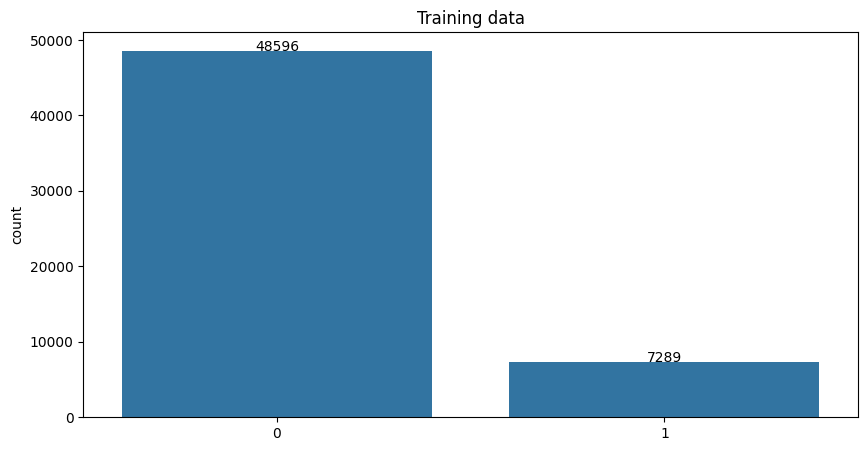

In [6]:
plt.figure(figsize=(10, 5))

sns.countplot(x=training_data['label'])
plt.title("Training data")
# add labels on top of the data 
# add labels on top of the data( note there is only 2 cathegories 1, 0) 
for i in range(2):
	plt.text(i, training_data['label'].count(i), training_data['label'].count(i), ha = 'center')  # type: ignore
plt.show()


# Data augmentation
Handling imbalanced datasets

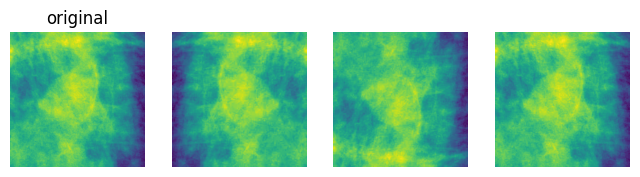

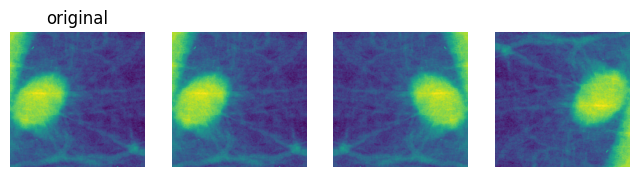

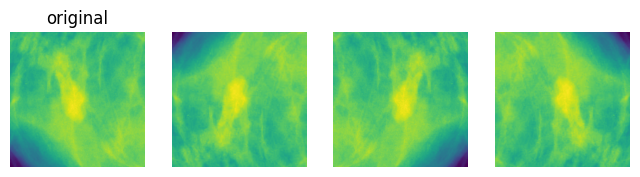

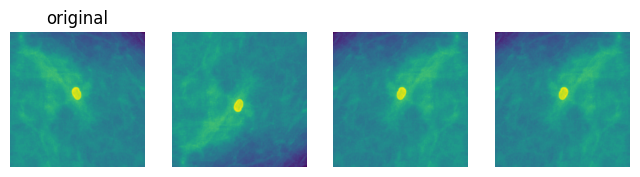

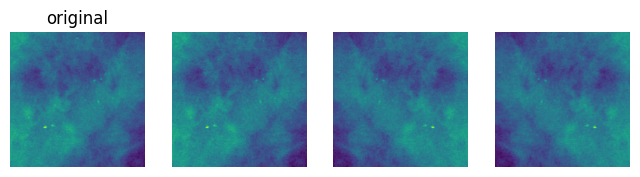

In [7]:
def augment(image, lower_c=0.8, high_c=1.0)-> tf.Tensor: 
    with tf.device("/CPU:0"):  
        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)
        image = tf.image.random_brightness(image, max_delta=0.25)
        image = tf.image.random_contrast(image, lower=lower_c, upper=high_c)
        image = tf.image.random_jpeg_quality(image, min_jpeg_quality=70, max_jpeg_quality=100)
        return image # type: ignore
    
augmented_images = []
augmented_labels = []
shown_once = 0
for label, image in zip(training_data["label"], training_data["data"]):
    # augment 3, positive, 1 negative 
    if label == 1:
        img1 = augment(image)
        img2 = augment(image, lower_c=1, high_c=1.3)
        img3 = augment(image, lower_c=0.8, high_c=1.2)
        augmented_images.extend([img1,img2, img3,  ])
        augmented_labels.extend([label, label,label, ])
        if shown_once<5: # To only show images once
            shown_once +=1  
            plt.figure(figsize=(8, 3))
            plt.subplot(1, 4, 1)
            plt.imshow(image)
            plt.title('original')
            plt.axis("off")
            plt.subplot(1, 4, 2)
            plt.imshow(img1)
            plt.axis("off")
            plt.subplot(1, 4, 3)
            plt.imshow(img2)
            plt.axis("off")
            plt.subplot(1, 4, 4)
            plt.imshow(img3)
            plt.axis("off")
            plt.show()
    img5 = augment(image)
    augmented_images.append(img5)
    augmented_labels.append(label) 
    
training_data["label"].extend(augmented_labels)
training_data["data"].extend(augmented_images)

In [8]:
import random

def shuffle(data_labels:data_type):
    # Create a list of indices from 0 to the length of data
    indices = list(range(len(data_labels['data'])))

    # Shuffle the indices
    random.shuffle(indices)

    # Use the shuffled indices to reorder data and labels
    shuffled_data = [data_labels['data'][i] for i in indices]
    shuffled_labels = [data_labels["label"][i] for i in indices]

    return shuffled_data, shuffled_labels

training_data['data'], training_data["label"] = shuffle(training_data)
training_data['data'], training_data["label"] = shuffle(training_data) # shuffle twice for better 

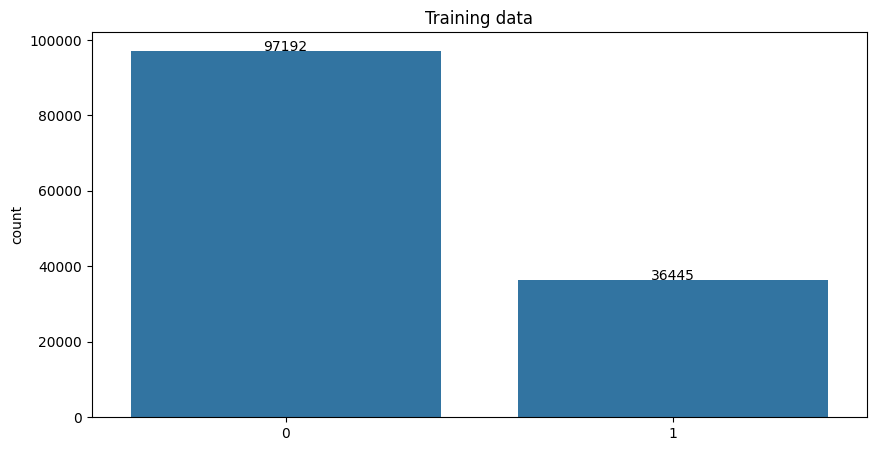

In [9]:
plt.figure(figsize=(10, 5))

sns.countplot(x=training_data['label'])
plt.title("Training data")
# add labels on top of the data 
# add labels on top of the data( note there is only 2 cathegories 1, 0) 
for i in range(2):
	plt.text(i, training_data['label'].count(i), training_data['label'].count(i), ha = 'center')  # type: ignore
plt.show()


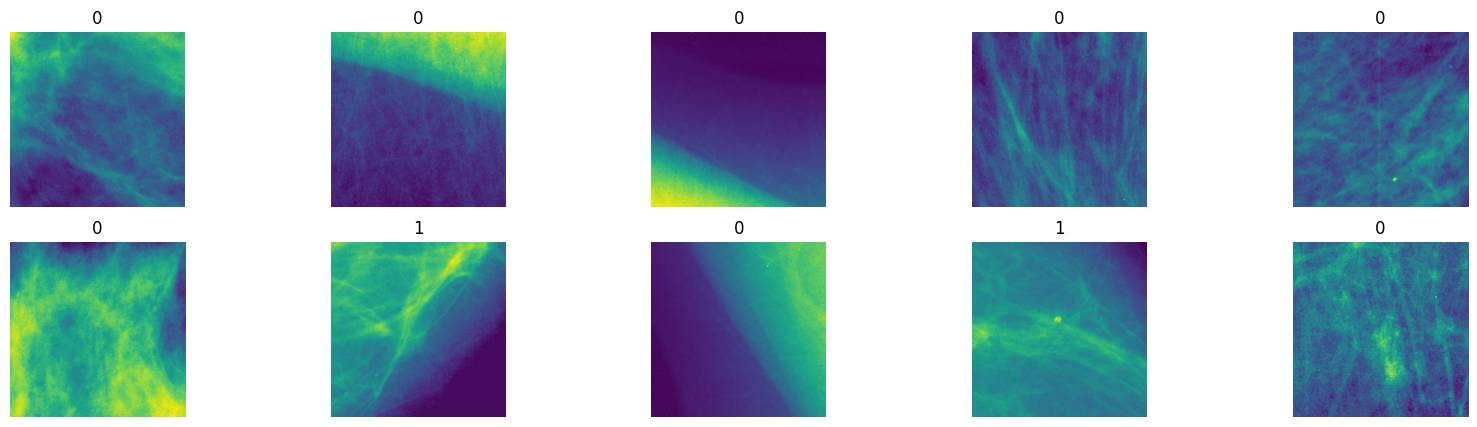

In [10]:
nrows = 2
ncols = 5

plt.figure(figsize=(20, 5))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(training_data["data"][i], )
    plt.title(str(training_data["label"][i]))
    # Remove the axis
    plt.axis('off')

# Show the plot
# plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.show()


# Loaing test data

In [11]:
test_files =  './data/unzipped_data/test10_data/test10_data.npy'
test_files_labels =  './data/unzipped_data/test10_labels.npy'

cross_validation_files =  './data/unzipped_data/cv10_data/cv10_data.npy'
cross_validation_files_labels = './data/unzipped_data/cv10_labels.npy'



# Note this data is ng, cv_data only contains masses, test_data only contains calcifications. 
test_data_ng = np.load( test_files)
test_data_labels = np.load(  test_files_labels) 
cv_data_ng = np.load( cross_validation_files)
cv_data_labels = np.load( cross_validation_files_labels)


# Fixing cv_data and test_data 
The data from CV only contains only calcifications and test files only contain masses.  

"**Note** - The data has been separated into training and test as per the division in the CBIS-DDSM dataset. The test files have been divided equally into test and validation data. However the split between test and validation data was done incorrectly, resulted in the test numpy files containing only masses and the validation files containing only calcifications. These files should be combined in order to have balanced and complete test data.
"

In [12]:
# 
cv_data : data_type = {'data': [], 'label': []}
test_data : data_type = {'data': [], 'label': []}
n_test = []  # data, label 
n_cv = [] # data, label 
for i in range( len(cv_data_ng)):
	if i%2: # odd 	
		n_test.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_test.append(   (test_data_ng[i], test_data_labels[i])   )
	else:
		n_cv.append(   (cv_data_ng[i], cv_data_labels[i])   )
		n_cv.append(   (test_data_ng[i], test_data_labels[i])   )

cv_data['data'] = [x[0] for x in n_cv]
cv_data['label'] = [np.int8(1) if x[1]>0 else np.int8(0) for x in n_cv]

test_data['data'] = [x[0] for x in n_test]
test_data['label'] = [np.int8(1) if x[1]>0 else np.int8(0) for x in n_test]

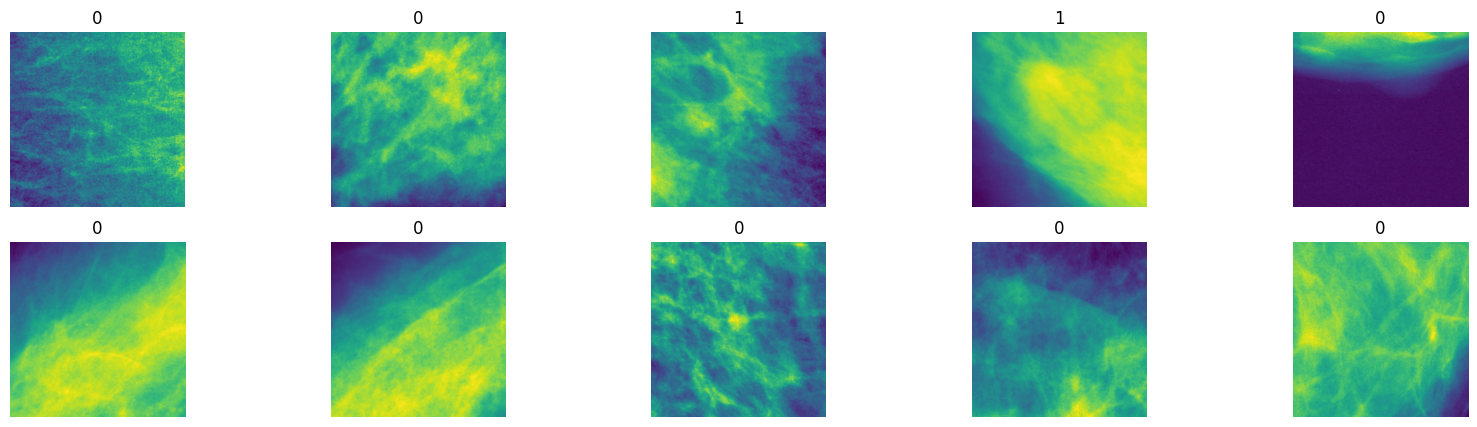

In [13]:
nrows = 2
ncols = 5

plt.figure(figsize=(20, 5))
for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(cv_data["data"][i], )
    plt.title(str(cv_data["label"][i]))
    # Remove the axis
    plt.axis('off')

plt.show()

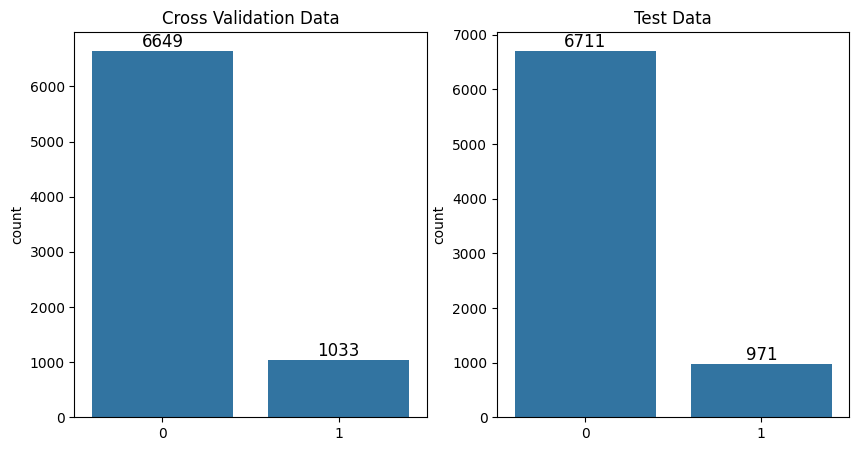

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x=cv_data['label'])
plt.title("Cross Validation Data")
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),  # type: ignore
            fontsize=12, ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.title("Test Data")
ax2 = sns.countplot(x=test_data['label'])
for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),  # type: ignore
            fontsize=12, ha='center', va='bottom')

plt.show()

In [15]:
len(training_data['data'])

133637

In [16]:
train_dataset = create_tf_dataset(training_data).batch(8).prefetch(tf.data.AUTOTUNE) # DatasetV2

In [17]:
cv_dataset = create_tf_dataset( cv_data).batch(64) # DatasetV2

In [18]:
# Find the weights for each class  
ones = 0 
zeros = 0 
for label in training_data['label']:
	if label == 1:
		ones += 1
	else:
		zeros += 1

total = ones + zeros

weights_dict = {0: (1/zeros) * (total/2), 1: (1/ones) * (total/2)}
weights_dict
# {0: 0.6499917688698658, 1: 2.1667581286870625}

{0: 0.6874897110873323, 1: 1.8334065029496502}

In [19]:
print(f'ones = {ones}, zeros={zeros}, total={total}')

ones = 36445, zeros=97192, total=133637


# Testing Googles Model 
### Inception V1

In [4]:
# google 
def inception_module_v1(x, filters, name="inception_#"):
    layer_1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu', name=f"{name}_Conv1x1")(x)

    layer_3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu', name=f"{name}_Conv3x3_1")(x)
    layer_3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu', name=f"{name}_Conv3x3")(layer_3x3)

    layer_5x5 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu', name=f"{name}_Conv5x5_1")(x)
    layer_5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu', name=f"{name}_Conv5x5")(layer_5x5)

    layer_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same', name=f"{name}_MaxPool")(x)
    layer_pool = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu', name=f"{name}_MaxPool_Conv1x1")(layer_pool)

    # Concatenate all the branches
    output = layers.concatenate([layer_1x1, layer_3x3, layer_5x5, layer_pool], name=f"{name}_concat")
    return output

def create_googlenet_v1()->Model:
    # Functional API style of creating a model
    
    input_layer = layers.Input(shape=(299, 299, 1))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)


    x = inception_module_v1(x, [64, 96, 128, 16, 32, 32], name="1_")  # Inception module 1
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module_v1(x, [128, 128, 192, 32, 96, 64], name="2_") # Inception module 2
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module_v1(x, [192, 96, 208, 16, 48, 64], name="3_")  # Inception module 3
    
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(1, activation='sigmoid')(x)  # Use sigmoid activation for binary classification

    model = Model(inputs=input_layer, outputs=x)
    return model

model_g = create_googlenet_v1()
model_g.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 150, 150,  │      3,200 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 75, 75,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        256 │ max_pooling2d_3[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__Conv3x3_1        │ (None, 75, 75,    │      6,240 │ batch_normalizat… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__Conv5x5_1        │ (None, 75, 75,    │      1,040 │ batch_normalizat… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__MaxPool          │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__Conv1x1 (Conv2D) │ (None, 75, 75,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__Conv3x3 (Conv2D) │ (None, 75, 75,    │    110,720 │ 1__Conv3x3_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__Conv5x5 (Conv2D) │ (None, 75, 75,    │     12,832 │ 1__Conv5x5_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__MaxPool_Conv1x1  │ (None, 75, 75,    │      2,080 │ 1__MaxPool[0][0]  │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1__concat           │ (None, 75, 75,    │          0 │ 1__Conv1x1[0][0], │
│ (Concatenate)       │ 256)              │            │ 1__Conv3x3[0][0], │
│                     │                   │            │ 1__Conv5x5[0][0], │
│                     │                   │            │ 1__MaxPool_Conv1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 38, 38,    │          0 │ 1__concat[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2__Conv3x3_1        │ (None, 38, 38,    │     32,896 │ max_pooling2d_4[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2__Conv5x5_1        │ (None, 38, 38,    │      8,224 │ max_pooling2d_4[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 2__MaxPool          │ (None, 38, 38,    │          0 │ max_pooling2d_4[… │
│ (MaxPooling2D)      │ 256)              │            │                 

 Total params: 905,953 (3.46 MB)

 Trainable params: 905,825 (3.46 MB)

 Non-trainable params: 128 (512.00 B)

In [21]:
model_g = create_googlenet_v1()
model_g.summary()

model_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])
best_val_recall_checkpoint = ModelCheckpoint('./model/GoogLetNet/best_recall.keras', monitor='val_recall', save_best_only=True)
best_val_loss_checkpoint = ModelCheckpoint('./model/GoogLetNet/best_loss.keras.keras', monitor='val_loss', save_best_only=True)
history_g = model_g.fit(train_dataset, validation_data=cv_dataset, epochs=50, callbacks=[best_val_recall_checkpoint, best_val_loss_checkpoint], class_weight=weights_dict)
model_g.save('model/GoogLetNet/latest_50_epochs.keras')

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 150, 150,  │      3,200 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 75, 75,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        256 │ max_pooling2d_6[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 75, 75,    │      6,240 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 75, 75,    │      1,040 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 75, 75,    │      4,160 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 75, 75,    │    110,720 │ conv2d_21[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 75, 75,    │     12,832 │ conv2d_23[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 75, 75,    │      2,080 │ max_pooling2d_7[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 75, 75,    │          0 │ conv2d_20[0][0],  │
│ (Concatenate)       │ 256)              │            │ conv2d_22[0][0],  │
│                     │                   │            │ conv2d_24[0][0],  │
│                     │                   │            │ conv2d_25[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 38, 38,    │          0 │ concatenate_3[0]… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 38, 38,    │     32,896 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 38, 38,    │      8,224 │ max_pooling2d_8[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 38, 38,    │          0 │ max_pooling2d_8[… │
│ (MaxPooling2D)      │ 256)              │            │                 

 Total params: 905,953 (3.46 MB)

 Trainable params: 905,825 (3.46 MB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50


I0000 00:00:1715735830.873565 3679488 service.cc:145] XLA service 0x7fa5ec002110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715735830.875809 3679488 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-05-15 01:17:11.479385: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 01:17:13.521778: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1715735850.510767 3679488 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_12', 116 bytes spill stores, 80 bytes spill loads

I0000 00:00:1715735850.533030 3679488 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  16705/Unknown 449s 24ms/step - accuracy: 0.7018 - loss: 0.5426 - precision: 0.4721 - recall: 0.7860

I0000 00:00:1715736247.216788 3679490 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_12', 116 bytes spill stores, 80 bytes spill loads

2024-05-15 01:24:07.357216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:24:07.357312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 01:24:07.357370: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:24:07.357398: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. M

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 477s 25ms/step - accuracy: 0.7018 - loss: 0.5426 - precision: 0.4722 - recall: 0.7860 - val_accuracy: 0.4347 - val_loss: 0.8102 - val_precision: 0.1883 - val_recall: 0.9681
Epoch 2/50
16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7999 - loss: 0.4127 - precision: 0.5944 - recall: 0.8385

2024-05-15 01:31:13.044563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:31:13.044671: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:31:13.044705: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 01:31:13.044743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 01:31:20.688237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:31:20.688305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 406s 24ms/step - accuracy: 0.7999 - loss: 0.4127 - precision: 0.5944 - recall: 0.8385 - val_accuracy: 0.8357 - val_loss: 0.3976 - val_precision: 0.4424 - val_recall: 0.8509
Epoch 3/50
16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8336 - loss: 0.3670 - precision: 0.6477 - recall: 0.8538

2024-05-15 01:38:06.637925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:38:06.637991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 01:38:06.638045: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:38:06.638080: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 01:38:12.641262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:38:12.641368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 412s 25ms/step - accuracy: 0.8336 - loss: 0.3670 - precision: 0.6477 - recall: 0.8538 - val_accuracy: 0.8778 - val_loss: 0.3015 - val_precision: 0.5275 - val_recall: 0.8712
Epoch 4/50
16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8595 - loss: 0.3243 - precision: 0.6941 - recall: 0.8661

2024-05-15 01:44:51.880561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:44:51.880656: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:44:51.880670: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 01:44:51.880701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 404s 24ms/step - accuracy: 0.8595 - loss: 0.3243 - precision: 0.6941 - recall: 0.8661 - val_accuracy: 0.8753 - val_loss: 0.3124 - val_precision: 0.5210 - val_recall: 0.9022
Epoch 5/50


2024-05-15 01:44:57.258126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:44:57.258232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8707 - loss: 0.3048 - precision: 0.7150 - recall: 0.8735

2024-05-15 01:51:29.196085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:51:29.196195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 01:51:33.617652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:51:33.617738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 397s 24ms/step - accuracy: 0.8707 - loss: 0.3048 - precision: 0.7150 - recall: 0.8735 - val_accuracy: 0.9035 - val_loss: 0.2406 - val_precision: 0.5953 - val_recall: 0.8829
Epoch 6/50
16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8790 - loss: 0.2882 - precision: 0.7311 - recall: 0.8790

2024-05-15 01:57:58.496577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:57:58.496645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 01:57:58.496662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:57:58.496670: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 389s 23ms/step - accuracy: 0.8790 - loss: 0.2882 - precision: 0.7311 - recall: 0.8790 - val_accuracy: 0.8835 - val_loss: 0.2863 - val_precision: 0.5397 - val_recall: 0.9080
Epoch 7/50


2024-05-15 01:58:03.023432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 01:58:03.023499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 01:58:03.023516: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 01:58:03.023549: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8850 - loss: 0.2779 - precision: 0.7440 - recall: 0.8810

2024-05-15 02:04:20.123825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:04:20.123976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 382s 23ms/step - accuracy: 0.8850 - loss: 0.2778 - precision: 0.7440 - recall: 0.8810 - val_accuracy: 0.8844 - val_loss: 0.2737 - val_precision: 0.5413 - val_recall: 0.9206
Epoch 8/50


2024-05-15 02:04:24.615291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:04:24.615350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 02:04:24.615365: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:04:24.615394: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8907 - loss: 0.2678 - precision: 0.7541 - recall: 0.8888

2024-05-15 02:11:19.657193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:11:19.657265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 02:11:19.657337: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:11:19.657383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 420s 25ms/step - accuracy: 0.8907 - loss: 0.2678 - precision: 0.7541 - recall: 0.8888 - val_accuracy: 0.8992 - val_loss: 0.2679 - val_precision: 0.5801 - val_recall: 0.9080
Epoch 9/50


2024-05-15 02:11:25.063812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:11:25.063901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 02:11:25.063917: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:11:25.063946: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8870 - loss: 0.2749 - precision: 0.7477 - recall: 0.8836

2024-05-15 02:19:04.989997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:19:04.990083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 02:19:04.990152: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:19:04.990179: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 466s 28ms/step - accuracy: 0.8870 - loss: 0.2749 - precision: 0.7477 - recall: 0.8836 - val_accuracy: 0.8974 - val_loss: 0.2887 - val_precision: 0.5739 - val_recall: 0.9206
Epoch 10/50


2024-05-15 02:19:10.861678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:19:10.862035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8935 - loss: 0.2649 - precision: 0.7616 - recall: 0.8872

2024-05-15 02:26:11.975965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:26:11.976147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 02:26:16.969073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:26:16.969167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 427s 26ms/step - accuracy: 0.8935 - loss: 0.2649 - precision: 0.7616 - recall: 0.8872 - val_accuracy: 0.9186 - val_loss: 0.2123 - val_precision: 0.6513 - val_recall: 0.8500
Epoch 11/50
16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9015 - loss: 0.2455 - precision: 0.7778 - recall: 0.8937

2024-05-15 02:34:07.184173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:34:07.184250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 474s 28ms/step - accuracy: 0.9015 - loss: 0.2455 - precision: 0.7778 - recall: 0.8937 - val_accuracy: 0.8664 - val_loss: 0.3562 - val_precision: 0.5018 - val_recall: 0.9255
Epoch 12/50


2024-05-15 02:34:12.189530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:34:12.189623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9045 - loss: 0.2399 - precision: 0.7850 - recall: 0.8945

2024-05-15 02:41:39.635286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:41:39.635374: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:41:39.635407: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 02:41:39.635418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 453s 27ms/step - accuracy: 0.9045 - loss: 0.2399 - precision: 0.7850 - recall: 0.8945 - val_accuracy: 0.9102 - val_loss: 0.2516 - val_precision: 0.6111 - val_recall: 0.9129
Epoch 13/50


2024-05-15 02:41:44.748443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:41:44.748548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9041 - loss: 0.2430 - precision: 0.7837 - recall: 0.8950

2024-05-15 02:48:30.613230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:48:30.613299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 02:48:30.613366: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 02:48:30.613396: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 02:48:35.906365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:48:35.906429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 412s 25ms/step - accuracy: 0.9041 - loss: 0.2430 - precision: 0.7837 - recall: 0.8950 - val_accuracy: 0.9235 - val_loss: 0.1981 - val_precision: 0.6700 - val_recall: 0.8490
Epoch 14/50
16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8975 - loss: 0.2729 - precision: 0.7695 - recall: 0.8903

2024-05-15 02:55:14.391020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:55:14.391106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 403s 24ms/step - accuracy: 0.8975 - loss: 0.2729 - precision: 0.7695 - recall: 0.8903 - val_accuracy: 0.9343 - val_loss: 0.1740 - val_precision: 0.7034 - val_recall: 0.8838
Epoch 15/50


2024-05-15 02:55:18.939138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 02:55:18.939221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9113 - loss: 0.2348 - precision: 0.7990 - recall: 0.9010

2024-05-15 03:01:50.093138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:01:50.093322: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 396s 24ms/step - accuracy: 0.9113 - loss: 0.2348 - precision: 0.7990 - recall: 0.9010 - val_accuracy: 0.9384 - val_loss: 0.1695 - val_precision: 0.7226 - val_recall: 0.8800
Epoch 16/50


2024-05-15 03:01:54.774296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:01:54.774366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:01:54.774383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:01:54.774415: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9002 - loss: 0.2642 - precision: 0.7769 - recall: 0.8893

2024-05-15 03:08:31.004237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:08:31.004371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 401s 24ms/step - accuracy: 0.9002 - loss: 0.2642 - precision: 0.7769 - recall: 0.8893 - val_accuracy: 0.9274 - val_loss: 0.2079 - val_precision: 0.6748 - val_recall: 0.8877
Epoch 17/50


2024-05-15 03:08:35.548601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:08:35.548687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9149 - loss: 0.2207 - precision: 0.8065 - recall: 0.9048

2024-05-15 03:15:20.477651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:15:20.477746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 410s 25ms/step - accuracy: 0.9149 - loss: 0.2207 - precision: 0.8065 - recall: 0.9048 - val_accuracy: 0.9360 - val_loss: 0.1817 - val_precision: 0.7128 - val_recall: 0.8771
Epoch 18/50


2024-05-15 03:15:25.210859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:15:25.211000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:15:25.211034: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:15:25.211077: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9138 - loss: 0.2233 - precision: 0.8040 - recall: 0.9042

2024-05-15 03:22:04.212246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:22:04.212315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 03:22:04.212366: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:22:04.212383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 404s 24ms/step - accuracy: 0.9138 - loss: 0.2233 - precision: 0.8040 - recall: 0.9042 - val_accuracy: 0.9202 - val_loss: 0.2140 - val_precision: 0.6489 - val_recall: 0.8858
Epoch 19/50


2024-05-15 03:22:09.537097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:22:09.537169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:22:09.537185: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:22:09.537218: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9120 - loss: 0.2284 - precision: 0.8004 - recall: 0.9022

2024-05-15 03:28:46.584895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:28:46.584961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 402s 24ms/step - accuracy: 0.9120 - loss: 0.2284 - precision: 0.8004 - recall: 0.9022 - val_accuracy: 0.9257 - val_loss: 0.2217 - val_precision: 0.6662 - val_recall: 0.8964
Epoch 20/50


2024-05-15 03:28:51.225641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:28:51.225718: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9152 - loss: 0.2293 - precision: 0.8080 - recall: 0.9032

2024-05-15 03:35:25.904270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-15 03:35:25.904346: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:35:25.904385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 399s 24ms/step - accuracy: 0.9152 - loss: 0.2293 - precision: 0.8080 - recall: 0.9032 - val_accuracy: 0.9162 - val_loss: 0.2438 - val_precision: 0.6320 - val_recall: 0.9013
Epoch 21/50


2024-05-15 03:35:30.395117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:35:30.395201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:35:30.395225: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:35:30.395264: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9184 - loss: 0.2165 - precision: 0.8151 - recall: 0.9060

2024-05-15 03:42:05.724604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:42:05.724679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 03:42:05.724730: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:42:05.724739: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 03:42:05.724778: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9247914573734562100


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 400s 24ms/step - accuracy: 0.9184 - loss: 0.2165 - precision: 0.8151 - recall: 0.9060 - val_accuracy: 0.9348 - val_loss: 0.4013 - val_precision: 0.7059 - val_recall: 0.8829
Epoch 22/50


2024-05-15 03:42:10.188581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:42:10.188666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9146 - loss: 0.2229 - precision: 0.8059 - recall: 0.9042

2024-05-15 03:48:42.892797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:48:42.892884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 03:48:42.892938: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:48:42.892992: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 397s 24ms/step - accuracy: 0.9146 - loss: 0.2229 - precision: 0.8059 - recall: 0.9042 - val_accuracy: 0.9183 - val_loss: 5.8738 - val_precision: 0.6367 - val_recall: 0.9129
Epoch 23/50


2024-05-15 03:48:47.409058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:48:47.409153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9191 - loss: 0.2130 - precision: 0.8153 - recall: 0.9092

2024-05-15 03:55:16.363614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:55:16.363695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 393s 24ms/step - accuracy: 0.9191 - loss: 0.2130 - precision: 0.8153 - recall: 0.9092 - val_accuracy: 0.9496 - val_loss: 0.2065 - val_precision: 0.7761 - val_recall: 0.8790
Epoch 24/50


2024-05-15 03:55:20.892353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 03:55:20.892413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 03:55:20.892428: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 03:55:20.892459: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9223 - loss: 0.2092 - precision: 0.8224 - recall: 0.9121

2024-05-15 04:02:02.665120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:02:02.665184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:02:02.665244: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:02:02.665281: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 406s 24ms/step - accuracy: 0.9223 - loss: 0.2092 - precision: 0.8224 - recall: 0.9121 - val_accuracy: 0.9279 - val_loss: 1.2211 - val_precision: 0.6852 - val_recall: 0.8577
Epoch 25/50


2024-05-15 04:02:07.208235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:02:07.208307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:02:07.208324: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:02:07.208357: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9211 - loss: 0.2110 - precision: 0.8202 - recall: 0.9099

2024-05-15 04:08:59.080627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:08:59.080720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:09:04.500830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:09:04.500938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 418s 25ms/step - accuracy: 0.9211 - loss: 0.2110 - precision: 0.8202 - recall: 0.9099 - val_accuracy: 0.9399 - val_loss: 0.1892 - val_precision: 0.7538 - val_recall: 0.8209
Epoch 26/50
16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9125 - loss: 0.2605 - precision: 0.8035 - recall: 0.8984

2024-05-15 04:15:31.417017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:15:31.417155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:15:31.417223: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:15:31.417250: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 393s 23ms/step - accuracy: 0.9125 - loss: 0.2605 - precision: 0.8035 - recall: 0.8984 - val_accuracy: 0.7963 - val_loss: 0.4671 - val_precision: 0.3917 - val_recall: 0.9313
Epoch 27/50


2024-05-15 04:15:37.928953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:15:37.929016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:15:37.929032: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:15:37.929064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8943 - loss: 0.2644 - precision: 0.7690 - recall: 0.8769

2024-05-15 04:22:35.181824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:22:35.181909: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:22:35.181940: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 04:22:35.181971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 04:22:39.983057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:22:39.983115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 422s 25ms/step - accuracy: 0.8943 - loss: 0.2644 - precision: 0.7691 - recall: 0.8769 - val_accuracy: 0.9487 - val_loss: 0.1561 - val_precision: 0.7983 - val_recall: 0.8277
Epoch 28/50
16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9192 - loss: 0.2320 - precision: 0.8175 - recall: 0.9057

2024-05-15 04:29:37.850145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:29:37.850330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:29:37.850489: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:29:37.850556: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 04:29:42.722637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:29:42.722730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: O

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 423s 25ms/step - accuracy: 0.9192 - loss: 0.2320 - precision: 0.8175 - recall: 0.9057 - val_accuracy: 0.9485 - val_loss: 0.3475 - val_precision: 0.8267 - val_recall: 0.7803
Epoch 29/50
16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9231 - loss: 0.2081 - precision: 0.8255 - recall: 0.9102

2024-05-15 04:36:38.583560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:36:38.583665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 420s 25ms/step - accuracy: 0.9231 - loss: 0.2081 - precision: 0.8255 - recall: 0.9102 - val_accuracy: 0.8896 - val_loss: 0.2921 - val_precision: 0.5564 - val_recall: 0.8829
Epoch 30/50


2024-05-15 04:36:43.252958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:36:43.253104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9235 - loss: 0.2094 - precision: 0.8267 - recall: 0.9097

2024-05-15 04:43:21.465018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:43:21.465120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 403s 24ms/step - accuracy: 0.9235 - loss: 0.2094 - precision: 0.8267 - recall: 0.9097 - val_accuracy: 0.9267 - val_loss: 0.2774 - val_precision: 0.6676 - val_recall: 0.9061
Epoch 31/50


2024-05-15 04:43:26.219464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:43:26.219572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9247 - loss: 0.2105 - precision: 0.8286 - recall: 0.9125

2024-05-15 04:50:11.156342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:50:11.156461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:50:15.813861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:50:15.813928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 04:50:15.813944: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:50:15.813976: I tensorflow/core/framework/local_ren

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 410s 25ms/step - accuracy: 0.9247 - loss: 0.2105 - precision: 0.8286 - recall: 0.9125 - val_accuracy: 0.9298 - val_loss: 0.5380 - val_precision: 0.7846 - val_recall: 0.6592
Epoch 32/50
16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9245 - loss: 0.2348 - precision: 0.8290 - recall: 0.9109

2024-05-15 04:57:03.195054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:57:03.195128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 04:57:03.195145: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:57:03.195152: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 04:57:03.195192: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9247914573734562100


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 412s 25ms/step - accuracy: 0.9245 - loss: 0.2348 - precision: 0.8290 - recall: 0.9109 - val_accuracy: 0.9513 - val_loss: 0.1596 - val_precision: 0.8863 - val_recall: 0.7318
Epoch 33/50


2024-05-15 04:57:08.129845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 04:57:08.129949: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 04:57:08.130078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9196 - loss: 0.2183 - precision: 0.8201 - recall: 0.9033

2024-05-15 05:03:57.111516: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:03:57.111638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 05:03:57.111693: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:03:57.111716: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 414s 25ms/step - accuracy: 0.9196 - loss: 0.2182 - precision: 0.8201 - recall: 0.9033 - val_accuracy: 0.9296 - val_loss: 0.4445 - val_precision: 0.6949 - val_recall: 0.8490
Epoch 34/50


2024-05-15 05:04:01.768691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:04:01.768782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9247 - loss: 0.2147 - precision: 0.8299 - recall: 0.9101

2024-05-15 05:10:43.009291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:10:43.009358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:10:43.009413: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:10:43.009429: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 406s 24ms/step - accuracy: 0.9247 - loss: 0.2147 - precision: 0.8299 - recall: 0.9101 - val_accuracy: 0.9229 - val_loss: 0.2808 - val_precision: 0.6539 - val_recall: 0.9071
Epoch 35/50


2024-05-15 05:10:47.669360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:10:47.669504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9242 - loss: 0.2083 - precision: 0.8284 - recall: 0.9105

2024-05-15 05:17:27.061909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:17:27.062049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 404s 24ms/step - accuracy: 0.9242 - loss: 0.2083 - precision: 0.8284 - recall: 0.9105 - val_accuracy: 0.9408 - val_loss: 0.2399 - val_precision: 0.7240 - val_recall: 0.9042
Epoch 36/50


2024-05-15 05:17:31.680621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:17:31.680738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9250 - loss: 0.2108 - precision: 0.8306 - recall: 0.9102

2024-05-15 05:24:12.062770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:24:12.062881: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:24:12.062918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-15 05:24:16.672774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:24:16.672839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:24:16.672854: I tensorflow/core/framework/local_ren

16705/16705 ━━━━━━━━━━━━━━━━━━━━ 405s 24ms/step - accuracy: 0.9250 - loss: 0.2108 - precision: 0.8306 - recall: 0.9102 - val_accuracy: 0.9482 - val_loss: 0.1458 - val_precision: 0.7900 - val_recall: 0.8374
Epoch 37/50
16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9268 - loss: 0.1999 - precision: 0.8353 - recall: 0.9111

2024-05-15 05:31:09.041890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:31:09.041973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:31:09.041993: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:31:09.041999: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 417s 25ms/step - accuracy: 0.9268 - loss: 0.1999 - precision: 0.8353 - recall: 0.9111 - val_accuracy: 0.9354 - val_loss: 9.7896 - val_precision: 0.7153 - val_recall: 0.8635
Epoch 38/50


2024-05-15 05:31:13.935714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:31:13.935805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9247 - loss: 0.3765 - precision: 0.8308 - recall: 0.9085

2024-05-15 05:38:09.834450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:38:09.834518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:38:09.834535: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:38:09.834542: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 421s 25ms/step - accuracy: 0.9247 - loss: 0.3765 - precision: 0.8308 - recall: 0.9085 - val_accuracy: 0.9361 - val_loss: 0.1901 - val_precision: 0.7016 - val_recall: 0.9129
Epoch 39/50


2024-05-15 05:38:14.712156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:38:14.712243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-05-15 05:38:14.712290: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9290 - loss: 0.1940 - precision: 0.8381 - recall: 0.9166

2024-05-15 05:45:02.257900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 05:45:02.258000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:45:02.258028: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:45:02.258042: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 413s 25ms/step - accuracy: 0.9290 - loss: 0.1940 - precision: 0.8381 - recall: 0.9166 - val_accuracy: 0.9350 - val_loss: 0.2161 - val_precision: 0.6957 - val_recall: 0.9187
Epoch 40/50


2024-05-15 05:45:07.559196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:45:07.559256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:45:07.559273: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:45:07.559305: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9297 - loss: 0.1905 - precision: 0.8398 - recall: 0.9168

2024-05-15 05:52:15.022555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:52:15.022637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:52:15.022658: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:52:15.022665: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 432s 26ms/step - accuracy: 0.9297 - loss: 0.1905 - precision: 0.8398 - recall: 0.9168 - val_accuracy: 0.9399 - val_loss: 0.3456 - val_precision: 0.7417 - val_recall: 0.8480
Epoch 41/50


2024-05-15 05:52:19.926383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:52:19.926449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:52:19.926465: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:52:19.926497: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9314 - loss: 0.1898 - precision: 0.8442 - recall: 0.9176

2024-05-15 05:59:15.706042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:59:15.706121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:59:15.706143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:59:15.706151: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 421s 25ms/step - accuracy: 0.9314 - loss: 0.1898 - precision: 0.8442 - recall: 0.9176 - val_accuracy: 0.9430 - val_loss: 0.1720 - val_precision: 0.7417 - val_recall: 0.8838
Epoch 42/50


2024-05-15 05:59:20.485876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 05:59:20.485945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 05:59:20.485960: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 05:59:20.485993: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9289 - loss: 0.1945 - precision: 0.8389 - recall: 0.9147

2024-05-15 06:06:17.551171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:06:17.551408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 422s 25ms/step - accuracy: 0.9289 - loss: 0.1945 - precision: 0.8390 - recall: 0.9147 - val_accuracy: 0.9445 - val_loss: 0.3681 - val_precision: 0.7921 - val_recall: 0.7967
Epoch 43/50


2024-05-15 06:06:22.931168: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:06:22.931242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:06:22.931259: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:06:22.931292: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9284 - loss: 0.2529 - precision: 0.8402 - recall: 0.9104

2024-05-15 06:13:25.991170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:13:25.991293: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:13:25.991326: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 06:13:25.991339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 428s 26ms/step - accuracy: 0.9284 - loss: 0.2529 - precision: 0.8402 - recall: 0.9104 - val_accuracy: 0.9456 - val_loss: 0.6997 - val_precision: 0.7948 - val_recall: 0.8025
Epoch 44/50


2024-05-15 06:13:31.092007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:13:31.092081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:13:31.092098: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:13:31.092132: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9278 - loss: 0.2052 - precision: 0.8376 - recall: 0.9122

2024-05-15 06:20:22.933470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:20:22.933566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 06:20:22.933683: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:20:22.933706: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 417s 25ms/step - accuracy: 0.9278 - loss: 0.2052 - precision: 0.8376 - recall: 0.9122 - val_accuracy: 0.9242 - val_loss: 0.3882 - val_precision: 0.6554 - val_recall: 0.9206
Epoch 45/50


2024-05-15 06:20:27.982156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:20:27.982248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:20:27.982363: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:20:27.982410: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9311 - loss: 0.1944 - precision: 0.8445 - recall: 0.9156

2024-05-15 06:27:17.011281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:27:17.011375: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:27:17.011391: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 06:27:17.011425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 414s 25ms/step - accuracy: 0.9311 - loss: 0.1944 - precision: 0.8445 - recall: 0.9156 - val_accuracy: 0.9166 - val_loss: 0.3640 - val_precision: 0.6274 - val_recall: 0.9342
Epoch 46/50


2024-05-15 06:27:22.134407: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:27:22.134504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:27:22.134528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:27:22.134574: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9297 - loss: 0.2047 - precision: 0.8428 - recall: 0.9120

2024-05-15 06:34:07.392741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:34:07.392815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:34:07.392836: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:34:07.392878: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 410s 25ms/step - accuracy: 0.9297 - loss: 0.2047 - precision: 0.8428 - recall: 0.9120 - val_accuracy: 0.9328 - val_loss: 0.7327 - val_precision: 0.6942 - val_recall: 0.8945
Epoch 47/50


2024-05-15 06:34:12.132413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:34:12.132500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9310 - loss: 0.1914 - precision: 0.8449 - recall: 0.9144

2024-05-15 06:40:59.635260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:40:59.635359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 412s 25ms/step - accuracy: 0.9310 - loss: 0.1914 - precision: 0.8449 - recall: 0.9144 - val_accuracy: 0.9145 - val_loss: 0.3197 - val_precision: 0.6275 - val_recall: 0.8955
Epoch 48/50


2024-05-15 06:41:04.365686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:41:04.365772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:41:04.365792: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:41:04.365835: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16703/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9297 - loss: 0.2202 - precision: 0.8423 - recall: 0.9130

2024-05-15 06:47:50.332319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:47:50.332394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 06:47:50.332492: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:47:50.332540: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 411s 25ms/step - accuracy: 0.9297 - loss: 0.2202 - precision: 0.8423 - recall: 0.9130 - val_accuracy: 0.9370 - val_loss: 0.1939 - val_precision: 0.7084 - val_recall: 0.9032
Epoch 49/50


2024-05-15 06:47:55.036134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:47:55.036195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:47:55.036211: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:47:55.036241: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16704/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9317 - loss: 0.1900 - precision: 0.8452 - recall: 0.9176

2024-05-15 06:54:44.516180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:54:44.516281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 414s 25ms/step - accuracy: 0.9317 - loss: 0.1900 - precision: 0.8452 - recall: 0.9176 - val_accuracy: 0.9149 - val_loss: 2.4019 - val_precision: 0.6219 - val_recall: 0.9361
Epoch 50/50


2024-05-15 06:54:49.304107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 06:54:49.304169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-05-15 06:54:49.304185: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 06:54:49.304217: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9306 - loss: 0.1992 - precision: 0.8434 - recall: 0.9155

2024-05-15 07:01:54.689002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 07:01:54.689068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-05-15 07:01:54.689085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1163251430439130209
2024-05-15 07:01:54.689091: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16324792761031967805
2024-05-15 07:01:54.689126: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9247914573734562100


16705/16705 ━━━━━━━━━━━━━━━━━━━━ 430s 26ms/step - accuracy: 0.9306 - loss: 0.1992 - precision: 0.8434 - recall: 0.9155 - val_accuracy: 0.9281 - val_loss: 0.5754 - val_precision: 0.6719 - val_recall: 0.9100


2024-05-15 07:01:59.382695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-15 07:01:59.382826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


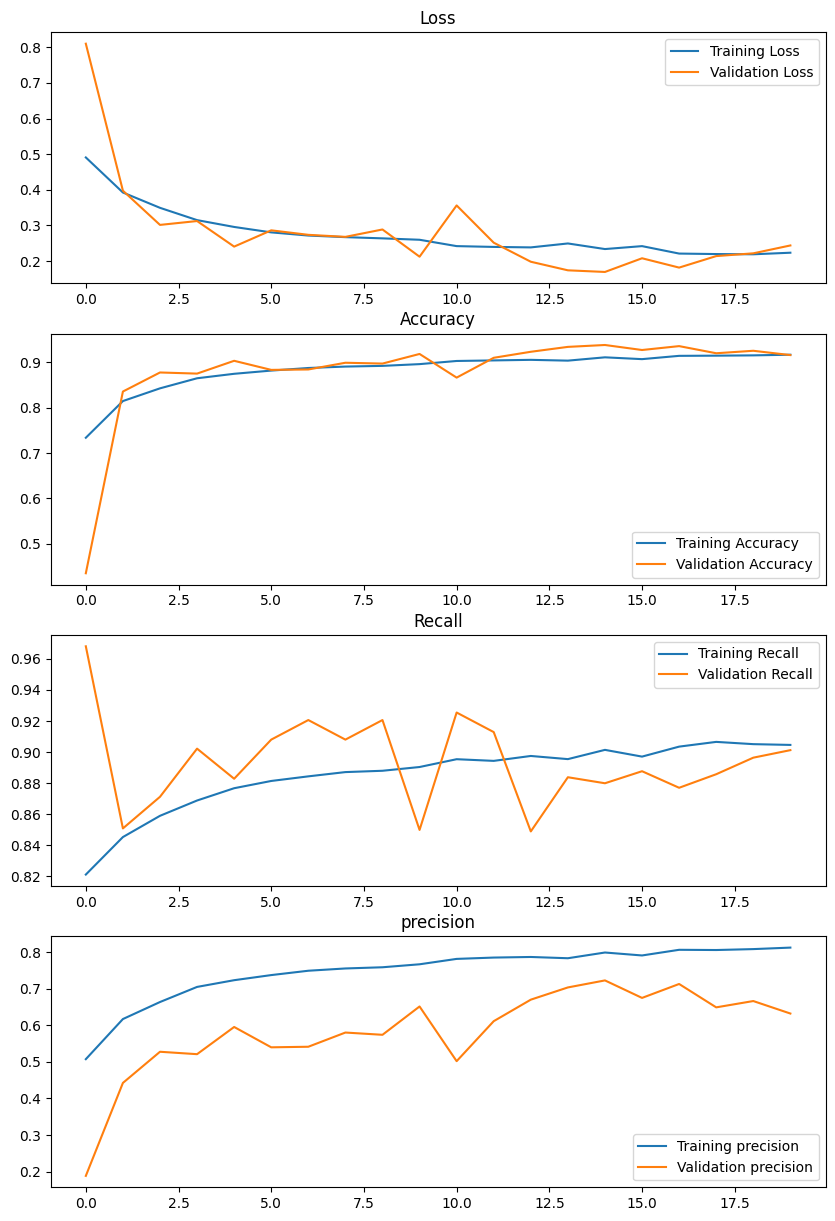

In [31]:
dict_up_to_20 = {
    "val_loss": history_g.history["val_loss"][:20],
    "loss": history_g.history["loss"][:20],
    "accuracy": history_g.history["accuracy"][:20],
    "recall": history_g.history["recall"][:20],
    "val_recall": history_g.history["val_recall"][:20],
    "val_accuracy": history_g.history["val_accuracy"][:20],
    "precision": history_g.history["precision"][:20],
    "val_precision": history_g.history["val_precision"][:20],
}
plot_histories([dict_up_to_20])

In [25]:
# Print all the history data 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.max_rows', None)  # None means unlimited

pd.DataFrame(history_g.history)

,accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
0,0.753190,0.472961,0.479717,0.822541,0.864879,0.705691,0.480620,0.060019
1,0.789676,0.404309,0.527066,0.862258,0.882062,0.350713,0.721254,0.200387
2,0.803828,0.381397,0.547121,0.870147,0.813200,0.377971,0.411532,0.905131
3,0.820353,0.358169,0.572389,0.875703,0.777402,0.418996,0.370455,0.937076
4,0.835787,0.340320,0.598436,0.876595,0.851211,0.340514,0.471679,0.886738
5,0.851869,0.319334,0.627716,0.879956,0.834809,0.361642,0.444497,0.914811
6,0.861430,0.304350,0.646376,0.882083,0.754621,0.490466,0.347421,0.939013
7,0.870279,0.288222,0.662840,0.891137,0.874251,0.290242,0.518478,0.909971
8,0.877038,0.276507,0.677381,0.891961,0.916688,0.227511,0.789396,0.518877
9,0.883354,0.264220,0.690583,0.895939,0.904712,0.230949,0.604008,0.846079


# Loading the test dataset
Loaded the test dataset towards the end so that we can have extra memory while training the models 

In [ ]:
test_dataset = create_tf_dataset(test_data).batch(64)

# Evaluating the best model against test data

In [ ]:
# latest model 
loss, accuracy,precision, recall = model_g.evaluate(test_dataset)

print("Loss: ", loss) 			# 
print("Accuracy: ", accuracy) 	# 
print("Recall: ", recall) 		# 
print('Precision = ', precision)# 


61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.9096 - loss: 0.3558 - precision: 0.9950 - recall: 0.2731
Loss:  0.3625551760196686
Accuracy:  0.9080968499183655
Recall:  0.2739443778991699
Precision =  0.9962546825408936


2024-05-14 05:12:39.520514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-14 05:12:39.520855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


In [ ]:
# best model in terms of loss 
from keras.models import load_model

loaded_model: Model  = load_model("./model/GoogLetNet/best_loss.keras")  # type: ignore
loss, accuracy, precision, recall = loaded_model.evaluate(test_dataset) 

print("Loss: ", loss) 			# 0.2357979118824005
print("Accuracy: ", accuracy) 	# 0.9073157906532288
print("Recall: ", recall) 		# 0.4984551966190338
print("Precision: ", precision) # 0.6826516389846802


61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - accuracy: 0.9474 - loss: 0.1380 - precision: 0.9638 - recall: 0.6093
Loss:  0.13600602746009827
Accuracy:  0.9480603933334351
Recall:  0.6086508631706238
Precision:  0.9688524603843689


2024-05-14 05:13:16.296963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-14 05:13:16.297700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
